In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D

import astropy.coordinates as coord
import astropy.units as u

import gala.dynamics as gd
import gala.potential as gp
from gala.units import galactic, solarsystem, dimensionless

In [2]:
#Andromeda Model https://academic.oup.com/mnras/article/528/2/2653/7512223
tot_mass = 1e13*u.Msun
0.5*tot_mass

dm_halo = gp.NFWPotential(m=0.85*tot_mass, r_s=30.*u.kpc, units=galactic)
bulge = gp.HernquistPotential(m=0.05*tot_mass, c=3, units=galactic)
disk = gp.MiyamotoNagaiPotential(m=0.10*tot_mass, a=2.5*u.kpc, b=0.28*u.kpc, units=galactic)

gal = dm_halo + disk + bulge

## DM HALO ONLY

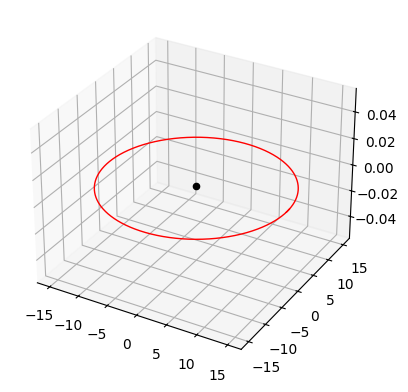

In [3]:
#w0 = gd.PhaseSpacePosition(pos=[15, 0, 0] * u.kpc, vel=[0,100,0] * u.km/u.s)
w0 = gd.PhaseSpacePosition(pos=[15, 0, 0] * u.kpc, vel=[0,419.2836,0] * u.km/u.s)
orbit = dm_halo.integrate_orbit(w0, dt=0.1*u.Myr, t1=0, t2=0.222*u.Gyr)


fig = plt.figure(figsize=(20,20))

gs = gridspec.GridSpec(3, 8)
ax = fig.add_subplot(gs[:2, :2],projection='3d')
ax.plot(orbit.x, orbit.y, orbit.z, c='red', lw=1)
ax.scatter(0, 0, 0, color='black',label='Centro galactico')

(-1.0, 1.0)

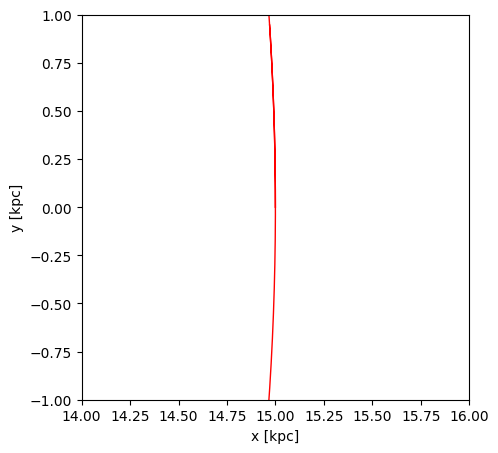

In [4]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.plot(orbit.x, orbit.y,c='red', lw=1)
ax.set_xlabel('x [kpc]')
ax.set_ylabel('y [kpc]')
#ax.set_xlim(15-0.0005,15+0.0005)
#ax.set_ylim(-0.05,0.05)
ax.set_xlim(15-1,15+1)
ax.set_ylim(-1,1)

Text(0, 0.5, 'z [kpc]')

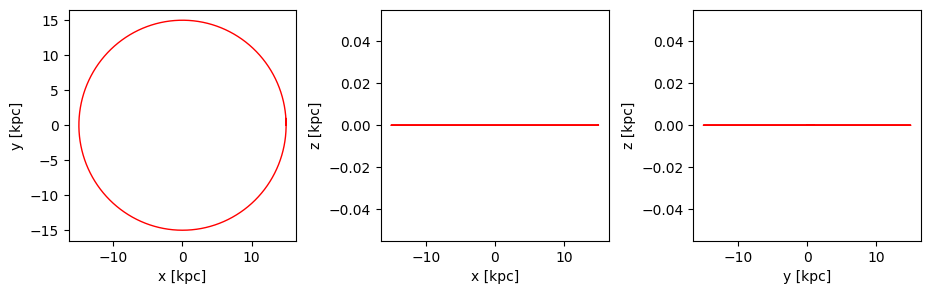

In [5]:
fig = plt.figure(figsize=(11, 3))

plt.subplots_adjust(wspace=0.37)

ax = fig.add_subplot(131)
ax.plot(orbit.x, orbit.y,c='red', lw=1)
ax.set_xlabel('x [kpc]')
ax.set_ylabel('y [kpc]')

ax = fig.add_subplot(132)
ax.plot(orbit.x, orbit.z,c='red', lw=1)
ax.set_xlabel('x [kpc]')
ax.set_ylabel('z [kpc]')

ax = fig.add_subplot(133)
ax.plot(orbit.y, orbit.z,c='red', lw=1)
ax.set_xlabel('y [kpc]')
ax.set_ylabel('z [kpc]')

#### 1) Calcular y graficar la evolución temporal de los siguiente parámetros:
##### a) Energia
##### b) Momento angular total
##### c) Las tres componentes del momento angular
##### d) Eccentricidad

#### Para cada una de estas orbitas, calcular su superficie de poincare. Considerar cortes de la superficie para valores dy/dt > 0 km/s

(6.4320965748622925, 6.432096574862307)

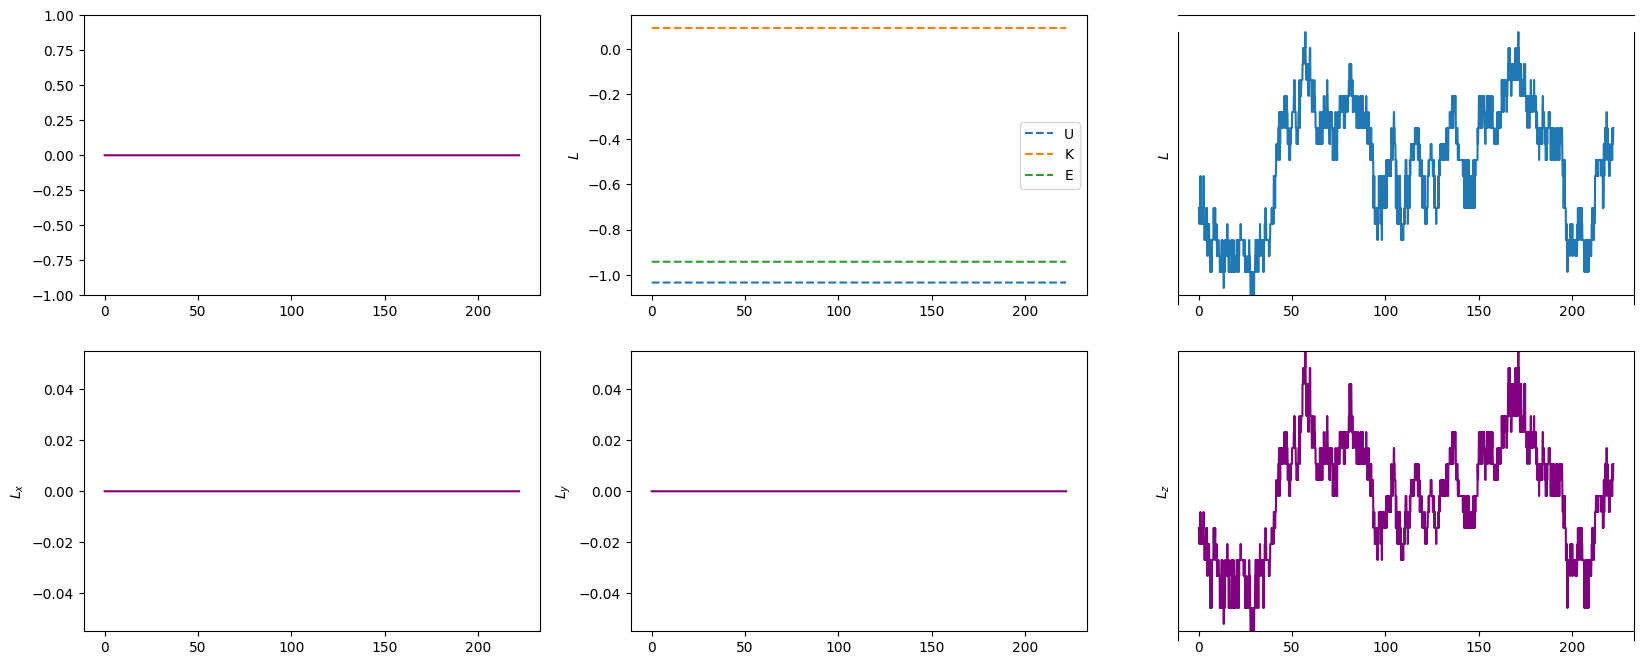

In [6]:
E = orbit.energy()
U_ = orbit.potential_energy()
K_ = orbit.kinetic_energy()
#E_ = U_ + K_
E_norm = (E[0]-E)/E[0]
L_ = orbit.angular_momentum()
Lx = L_[0]
Ly = L_[1]
Lz = L_[2]
ex = orbit.eccentricity()

L_tot = np.sqrt(Lx**2 + Ly**2 + Lz**2)

#-----------------------------------------------------

fig, ((ax0, ax1, ax2), (ax3, ax4, ax5)) = plt.subplots(2, 3, figsize=(20, 8))

ax0.plot(orbit.t, E_norm, c='purple')
ax0.set_ylim(-1,1)

ax1.plot(orbit.t, U_, '--', label='U')
ax1.plot(orbit.t, K_, '--', label='K')
ax1.plot(orbit.t, E, '--', label='E')
ax1.set_ylabel(r'$L$')
ax1.legend()

ax2.plot(orbit.t, L_tot)
ax2.set_ylabel(r'$L$')
ax2.set_ylim(min(L_tot.value), max(L_tot.value))
#ax2.set_yticklabels(ax2.get_yticklabels(), rotation=90, va='bottom')

ax3.plot(orbit.t, Lx, c='purple')
ax3.set_ylabel(r'$L_x$')

ax4.plot(orbit.t, Ly, c='purple')
ax4.set_ylabel(r'$L_y$')

ax5.plot(orbit.t, Lz, c='purple')
ax5.set_ylabel(r'$L_z$')
ax5.set_ylim(min(Lz.value), max(Lz.value))
#ax5.set_yticklabels(ax5.get_yticklabels(), rotation=90, va='bottom')

Text(0, 0.5, '$\\dot{z}$ [kpc Myr$^{-1}$]')

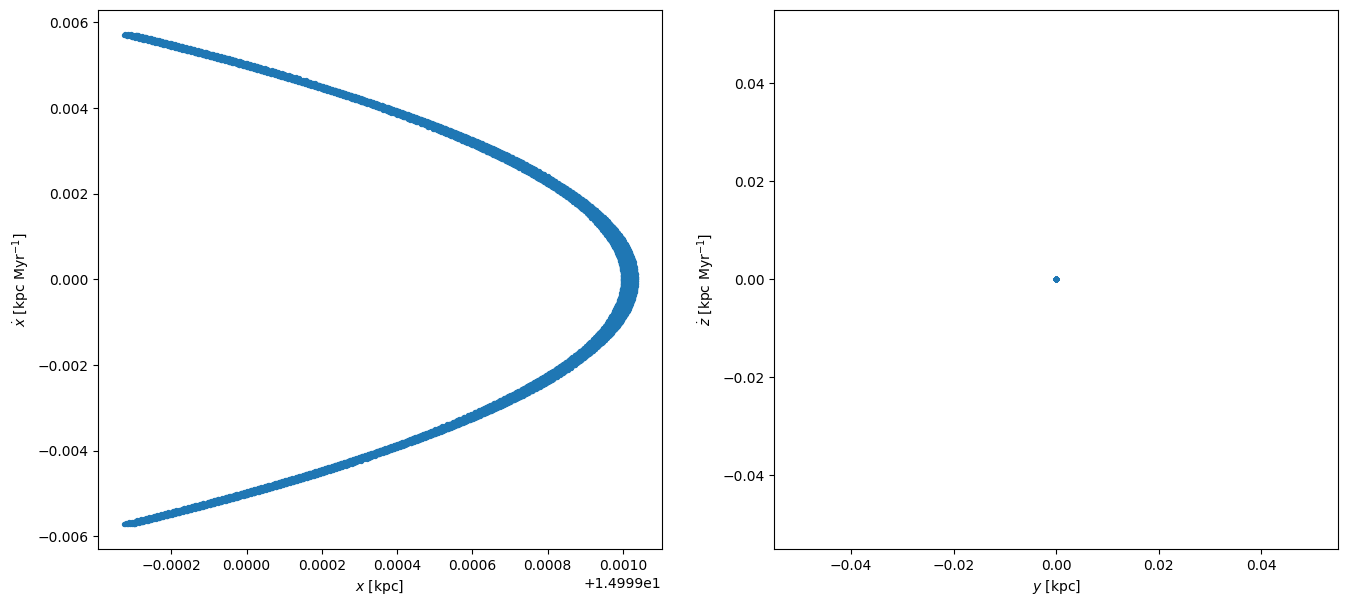

In [7]:
orbit = dm_halo.integrate_orbit(w0, dt=0.1*u.Myr, t1=0, t2=100*u.Gyr)
delta = 0.2
#-----------------------------------------------------
p_x = orbit.x
p_y = orbit.y
p_z = orbit.z
v_x = orbit.v_x
v_y = orbit.v_y
v_z = orbit.v_z

# Identify intersection points
pci = np.where((np.abs(p_y.value) <= delta) & (v_y.value > 0))[0]

pc_p_x = p_x[pci]
pc_p_z = p_z[pci]
pc_v_x = v_x[pci]
pc_v_z = v_z[pci]

# Plot Poincaré surface
fig, axs = plt.subplots(1, 2, figsize=(16, 7))
axs[0].scatter(pc_p_x, pc_v_x, s=8)
axs[0].set_xlabel(r'$x$ [kpc]')
axs[0].set_ylabel(r'$\dot{x}$ [kpc Myr$^{-1}$]')

axs[1].scatter(pc_p_z, pc_v_z, s=8)
axs[1].set_xlabel(r'$y$ [kpc]')
axs[1].set_ylabel(r'$\dot{z}$ [kpc Myr$^{-1}$]')

## DM Halo + Disk

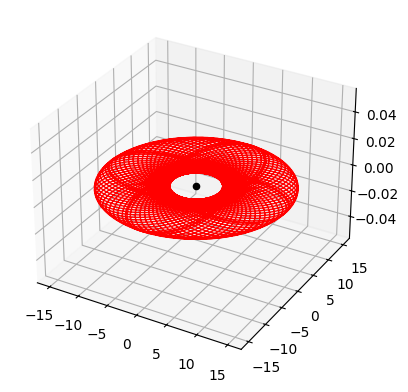

In [8]:
pot_2 = dm_halo + disk
w0 = gd.PhaseSpacePosition(pos=[15, 0, 0] * u.kpc, vel=[0,333.832,0] * u.km/u.s)
orbit = pot_2.integrate_orbit(w0, dt=1*u.Myr, t1=0, t2=5*u.Gyr)

#----
fig = plt.figure(figsize=(20,20))

gs = gridspec.GridSpec(3, 8)
ax = fig.add_subplot(gs[:2, :2],projection='3d')
ax.plot(orbit.x, orbit.y, orbit.z, c='red', lw=1)
ax.scatter(0, 0, 0, color='black',label='Centro galactico')

/tmp/ipykernel_18818/2742653971.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(ax2.get_yticklabels(), rotation=90, va='bottom')
/tmp/ipykernel_18818/2742653971.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax5.set_yticklabels(ax5.get_yticklabels(), rotation=90, va='bottom')


[Text(0, 5.1212107122224, '5.1212107122224'),
 Text(0, 5.1212107122226, '5.1212107122226'),
 Text(0, 5.121210712222799, '5.1212107122228'),
 Text(0, 5.121210712223, '5.1212107122230'),
 Text(0, 5.1212107122232, '5.1212107122232'),
 Text(0, 5.1212107122234, '5.1212107122234'),
 Text(0, 5.1212107122236, '5.1212107122236')]

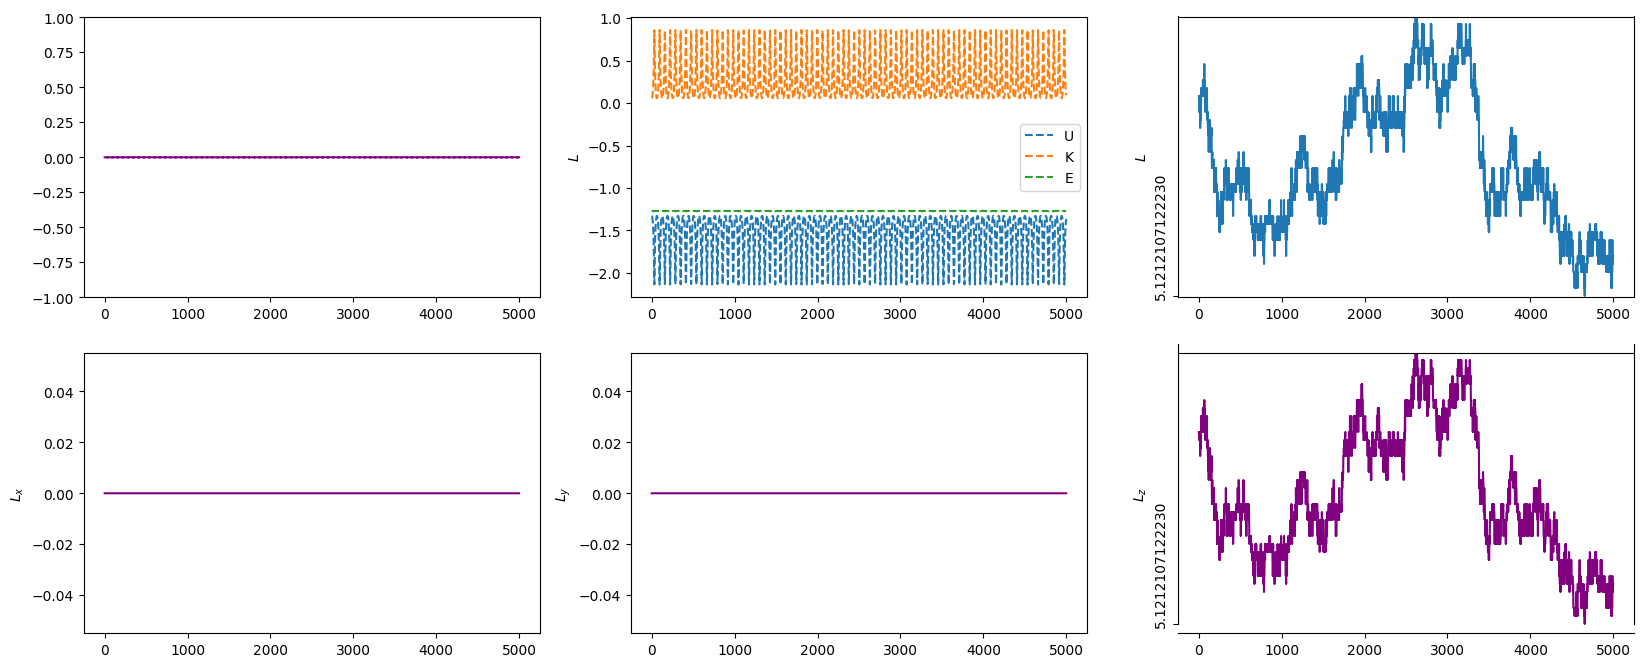

In [9]:
E = orbit.energy()
U_ = orbit.potential_energy()
K_ = orbit.kinetic_energy()
#E_ = U_ + K_
E_norm = (E[0]-E)/E[0]
L_ = orbit.angular_momentum()
Lx = L_[0]
Ly = L_[1]
Lz = L_[2]
ex = orbit.eccentricity()

L_tot = np.sqrt(Lx**2 + Ly**2 + Lz**2)

#---------------------------------------------------- 

fig, ((ax0, ax1, ax2), (ax3, ax4, ax5)) = plt.subplots(2, 3, figsize=(20, 8))

ax0.plot(orbit.t, E_norm, c='purple')
ax0.set_ylim(-1,1)

ax1.plot(orbit.t, U_, '--', label='U')
ax1.plot(orbit.t, K_, '--', label='K')
ax1.plot(orbit.t, E, '--', label='E')
ax1.set_ylabel(r'$L$')
ax1.legend()

ax2.plot(orbit.t, L_tot)
ax2.set_ylabel(r'$L$')
ax2.set_ylim(min(L_tot.value), max(L_tot.value))
ax2.set_yticklabels(ax2.get_yticklabels(), rotation=90, va='bottom')

ax3.plot(orbit.t, Lx, c='purple')
ax3.set_ylabel(r'$L_x$')

ax4.plot(orbit.t, Ly, c='purple')
ax4.set_ylabel(r'$L_y$')

ax5.plot(orbit.t, Lz, c='purple')
ax5.set_ylabel(r'$L_z$')
ax5.set_ylim(min(Lz.value), max(Lz.value))
ax5.set_yticklabels(ax5.get_yticklabels(), rotation=90, va='bottom')

Text(0, 0.5, '$\\dot{z}$ [kpc Myr$^{-1}$]')

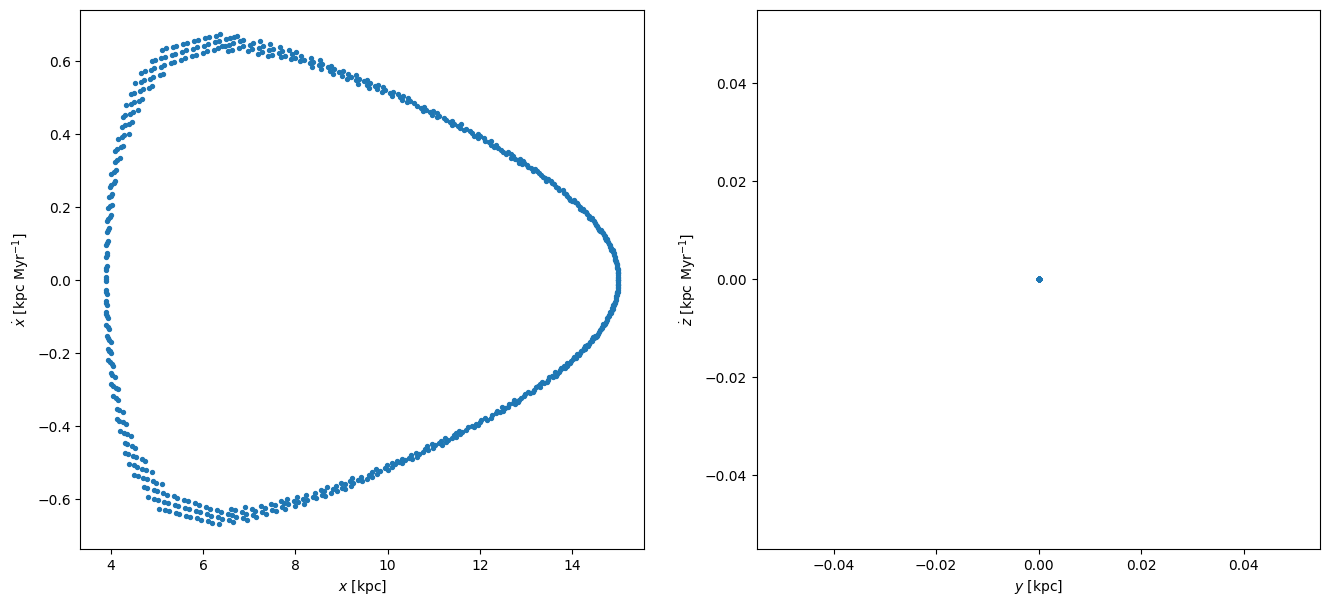

In [10]:
orbit = pot_2.integrate_orbit(w0, dt=1*u.Myr, t1=0, t2=100*u.Gyr)
delta = 0.2
#-----------------------------------------------------
p_x = orbit.x
p_y = orbit.y
p_z = orbit.z
v_x = orbit.v_x
v_y = orbit.v_y
v_z = orbit.v_z

# Identify intersection points
pci = np.where((np.abs(p_y.value) <= delta) & (v_y.value > 0))[0]

pc_p_x = p_x[pci]
pc_p_z = p_z[pci]
pc_v_x = v_x[pci]
pc_v_z = v_z[pci]

# Plot Poincaré surface
fig, axs = plt.subplots(1, 2, figsize=(16, 7))
axs[0].scatter(pc_p_x, pc_v_x, s=8)
axs[0].set_xlabel(r'$x$ [kpc]')
axs[0].set_ylabel(r'$\dot{x}$ [kpc Myr$^{-1}$]')

axs[1].scatter(pc_p_z, pc_v_z, s=8)
axs[1].set_xlabel(r'$y$ [kpc]')
axs[1].set_ylabel(r'$\dot{z}$ [kpc Myr$^{-1}$]')

## DM Halo + Disk + Bulge

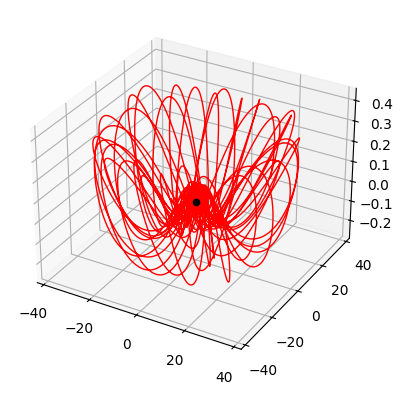

In [11]:
pot_3 = dm_halo + disk + bulge
w0 = gd.PhaseSpacePosition(pos=[15, 30, 0] * u.kpc, vel=[0,333.832,10] * u.km/u.s)
orbit = pot_3.integrate_orbit(w0, dt=1*u.Myr, t1=0, t2=5*u.Gyr)


fig = plt.figure(figsize=(20,20))
gs = gridspec.GridSpec(3, 8)
ax = fig.add_subplot(gs[:2, :2],projection='3d')
ax.plot(orbit.x, orbit.y, orbit.z, c='red', lw=1)
ax.scatter(0, 0, 0, color='black',label='Centro galactico')

Text(0, 0.5, 'z [kpc]')

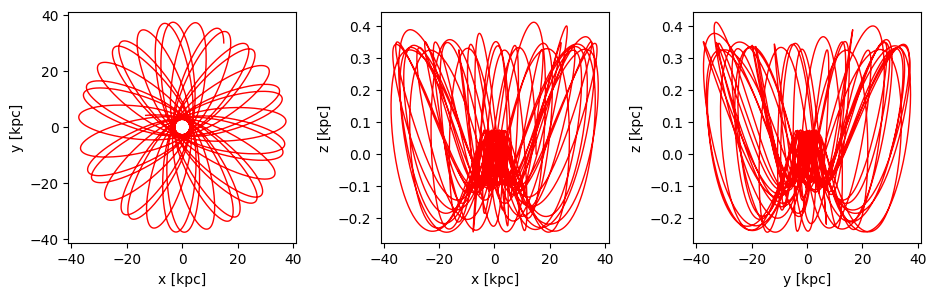

In [12]:
fig = plt.figure(figsize=(11, 3))

plt.subplots_adjust(wspace=0.37)

ax = fig.add_subplot(131)
ax.plot(orbit.x, orbit.y,c='red', lw=1)
ax.set_xlabel('x [kpc]')
ax.set_ylabel('y [kpc]')

ax = fig.add_subplot(132)
ax.plot(orbit.x, orbit.z,c='red', lw=1)
ax.set_xlabel('x [kpc]')
ax.set_ylabel('z [kpc]')

ax = fig.add_subplot(133)
ax.plot(orbit.y, orbit.z,c='red', lw=1)
ax.set_xlabel('y [kpc]')
ax.set_ylabel('z [kpc]')

/tmp/ipykernel_18818/1857424571.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax5.set_yticklabels(ax5.get_yticklabels(), rotation=90, va='bottom')


[Text(0, 5.1212107122226, '5.1212107122226'),
 Text(0, 5.121210712222799, '5.1212107122228'),
 Text(0, 5.121210712223, '5.1212107122230'),
 Text(0, 5.1212107122232, '5.1212107122232'),
 Text(0, 5.1212107122234, '5.1212107122234'),
 Text(0, 5.1212107122236, '5.1212107122236')]

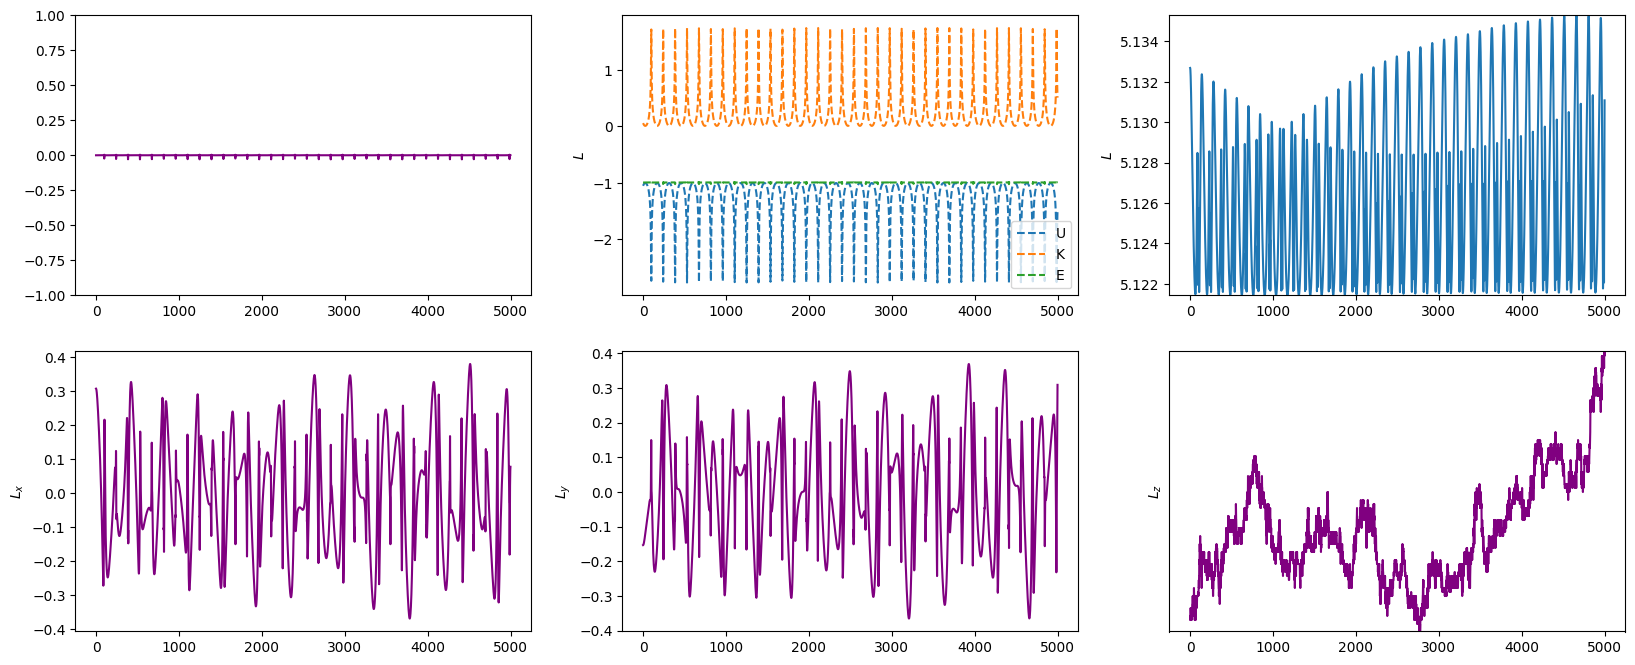

In [13]:
E = orbit.energy()
U_ = orbit.potential_energy()
K_ = orbit.kinetic_energy()
#E_ = U_ + K_
E_norm = (E[0]-E)/E[0]
L_ = orbit.angular_momentum()
Lx = L_[0]
Ly = L_[1]
Lz = L_[2]
ex = orbit.eccentricity()

L_tot = np.sqrt(Lx**2 + Ly**2 + Lz**2)

#------------------------------------------------------

fig, ((ax0, ax1, ax2), (ax3, ax4, ax5)) = plt.subplots(2, 3, figsize=(20, 8))

ax0.plot(orbit.t, E_norm, c='purple')
ax0.set_ylim(-1,1)

ax1.plot(orbit.t, U_, '--', label='U')
ax1.plot(orbit.t, K_, '--', label='K')
ax1.plot(orbit.t, E, '--', label='E')
ax1.set_ylabel(r'$L$')
ax1.legend()

ax2.plot(orbit.t, L_tot)
ax2.set_ylabel(r'$L$')
ax2.set_ylim(min(L_tot.value), max(L_tot.value))

ax3.plot(orbit.t, Lx, c='purple')
ax3.set_ylabel(r'$L_x$')

ax4.plot(orbit.t, Ly, c='purple')
ax4.set_ylabel(r'$L_y$')

ax5.plot(orbit.t, Lz, c='purple')
ax5.set_ylabel(r'$L_z$')
ax5.set_ylim(min(Lz.value), max(Lz.value))
ax5.set_yticklabels(ax5.get_yticklabels(), rotation=90, va='bottom')

Text(0, 0.5, '$\\dot{z}$ [kpc Myr$^{-1}$]')

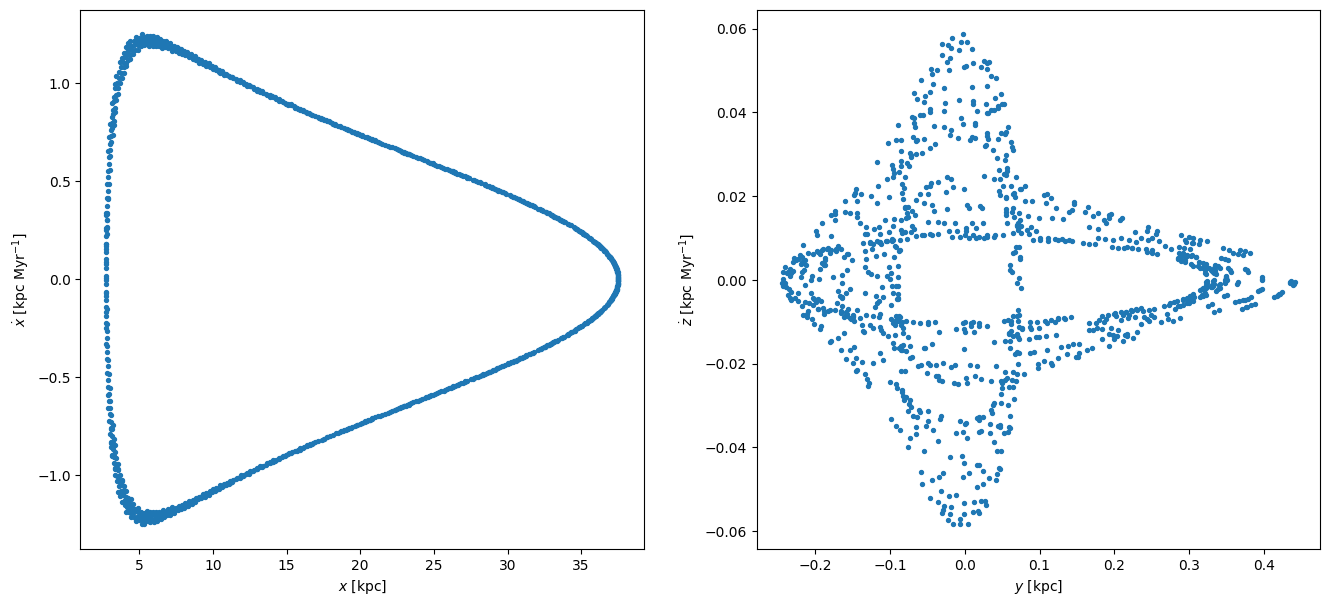

In [14]:
orbit = pot_3.integrate_orbit(w0, dt=1*u.Myr, t1=0, t2=300*u.Gyr)

delta = 0.2
#-----------------------------------------------------
p_x = orbit.x
p_y = orbit.y
p_z = orbit.z
v_x = orbit.v_x
v_y = orbit.v_y
v_z = orbit.v_z

# Identify intersection points
pci = np.where((np.abs(p_y.value) <= delta) & (v_y.value > 0))[0]

pc_p_x = p_x[pci]
pc_p_z = p_z[pci]
pc_v_x = v_x[pci]
pc_v_z = v_z[pci]

# Plot Poincaré surface
fig, axs = plt.subplots(1, 2, figsize=(16, 7))
axs[0].scatter(pc_p_x, pc_v_x, s=8)
axs[0].set_xlabel(r'$x$ [kpc]')
axs[0].set_ylabel(r'$\dot{x}$ [kpc Myr$^{-1}$]')

axs[1].scatter(pc_p_z, pc_v_z, s=8)
axs[1].set_xlabel(r'$y$ [kpc]')
axs[1].set_ylabel(r'$\dot{z}$ [kpc Myr$^{-1}$]')

### 3) Repetir el análisis para 
#### a) una orbita circular en un potencial que contenga solo DM halo y un disco Miyamoto-Nagai. Considerar condiciones iniciales pos = (x,0,0), vel = (0, Vcirc(x), 0)

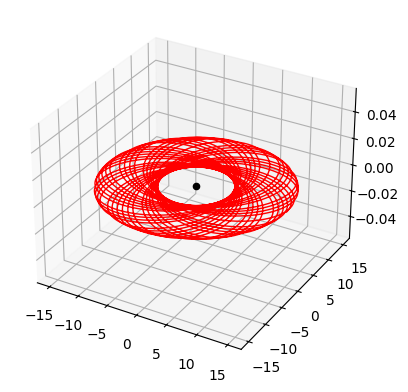

In [15]:
tot_mass = 1e13*u.Msun

dm_halo = gp.NFWPotential(m=0.85*tot_mass, r_s=30.*u.kpc, units=galactic)
disk = gp.MiyamotoNagaiPotential(m=0.10*tot_mass, a=2.5*u.kpc, b=0.28*u.kpc, units=galactic)

gal = dm_halo + disk

w0 = gd.PhaseSpacePosition(pos=[15, 0, 0] * u.kpc, vel=[0,419.2836,0] * u.km/u.s)
orbit = gal.integrate_orbit(w0, dt=0.1*u.Myr, t1=0, t2=3*u.Gyr)

#----------------------------------------

fig = plt.figure(figsize=(20,20))

gs = gridspec.GridSpec(3, 8)
ax = fig.add_subplot(gs[:2, :2],projection='3d')
ax.plot(orbit.x, orbit.y, orbit.z, c='red', lw=1)
ax.scatter(0, 0, 0, color='black',label='Centro galactico')

Text(0, 0.5, 'z [kpc]')

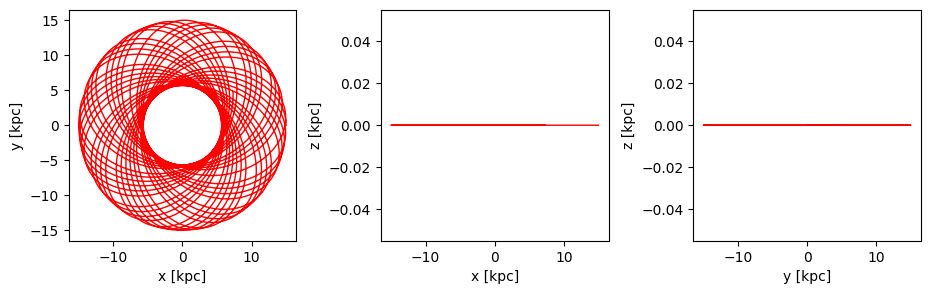

In [16]:
fig = plt.figure(figsize=(11, 3))

plt.subplots_adjust(wspace=0.37)

ax = fig.add_subplot(131)
ax.plot(orbit.x, orbit.y,c='red', lw=1)
ax.set_xlabel('x [kpc]')
ax.set_ylabel('y [kpc]')

ax = fig.add_subplot(132)
ax.plot(orbit.x, orbit.z,c='red', lw=1)
ax.set_xlabel('x [kpc]')
ax.set_ylabel('z [kpc]')

ax = fig.add_subplot(133)
ax.plot(orbit.y, orbit.z,c='red', lw=1)
ax.set_xlabel('y [kpc]')
ax.set_ylabel('z [kpc]')

(6.432096574862257, 6.4320965748623)

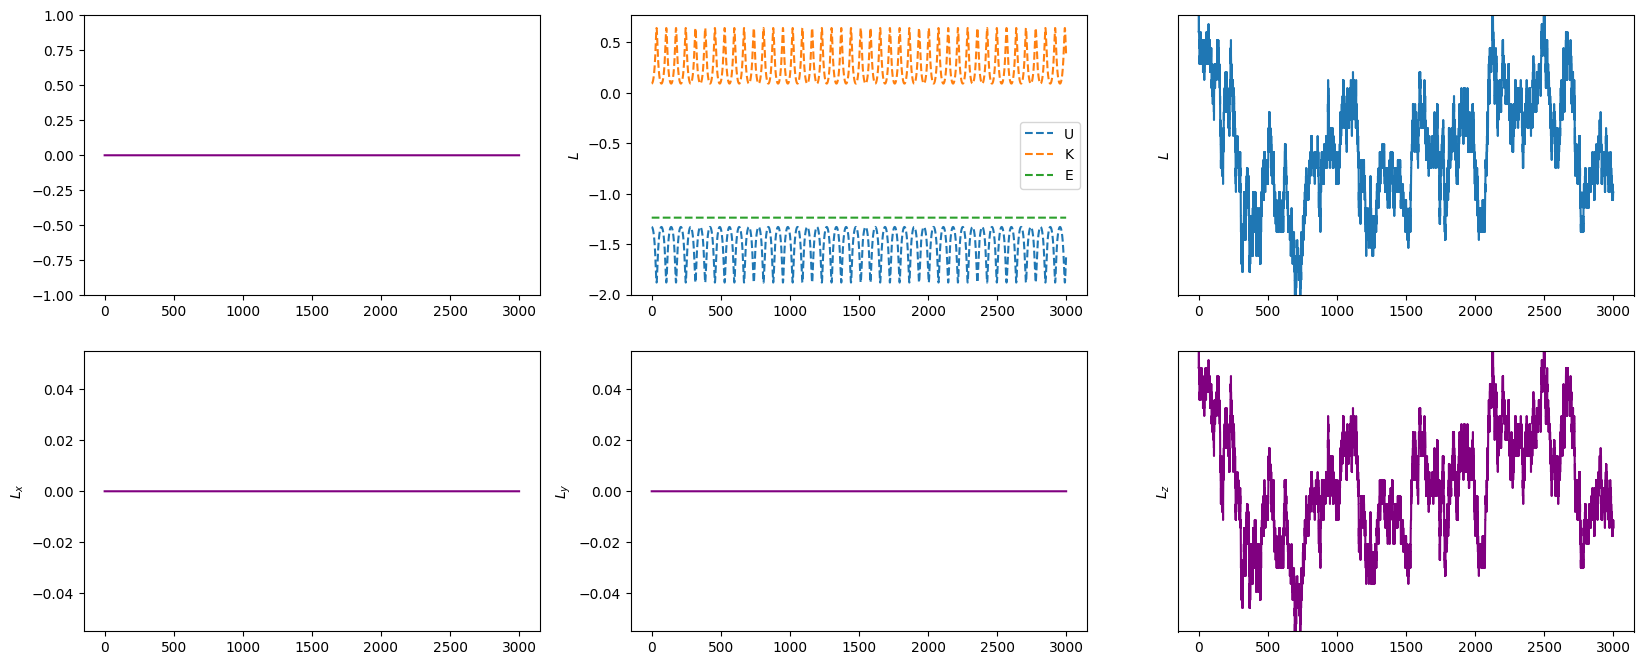

In [17]:
E = orbit.energy()
U_ = orbit.potential_energy()
K_ = orbit.kinetic_energy()
#E_ = U_ + K_
E_norm = (E[0]-E)/E[0]
L_ = orbit.angular_momentum()
Lx = L_[0]
Ly = L_[1]
Lz = L_[2]
ex = orbit.eccentricity()

L_tot = np.sqrt(Lx**2 + Ly**2 + Lz**2)

# ---------------------------------

fig, ((ax0, ax1, ax2), (ax3, ax4, ax5)) = plt.subplots(2, 3, figsize=(20, 8))

ax0.plot(orbit.t, E_norm, c='purple')
ax0.set_ylim(-1,1)

ax1.plot(orbit.t, U_, '--', label='U')
ax1.plot(orbit.t, K_, '--', label='K')
ax1.plot(orbit.t, E, '--', label='E')
ax1.set_ylabel(r'$L$')
ax1.legend()

ax2.plot(orbit.t, L_tot)
ax2.set_ylabel(r'$L$')
ax2.set_ylim(min(L_tot.value), max(L_tot.value))

ax3.plot(orbit.t, Lx, c='purple')
ax3.set_ylabel(r'$L_x$')

ax4.plot(orbit.t, Ly, c='purple')
ax4.set_ylabel(r'$L_y$')

ax5.plot(orbit.t, Lz, c='purple')
ax5.set_ylabel(r'$L_z$')
ax5.set_ylim(min(Lz.value), max(Lz.value))

Text(0, 0.5, '$\\dot{z}$ [kpc Myr$^{-1}$]')

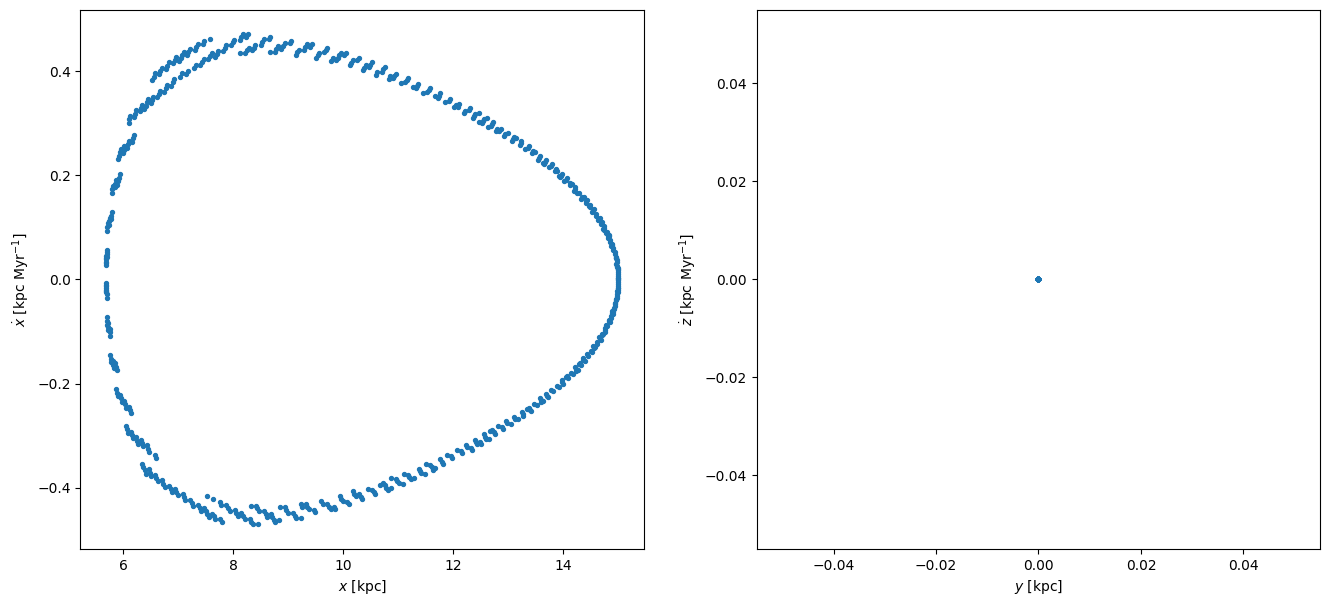

In [18]:
orbit = gal.integrate_orbit(w0, dt=1*u.Myr, t1=0, t2=100*u.Gyr)

delta = 0.2
#-----------------------------------------------------
p_x = orbit.x
p_y = orbit.y
p_z = orbit.z
v_x = orbit.v_x
v_y = orbit.v_y
v_z = orbit.v_z

# Identify intersection points
pci = np.where((np.abs(p_y.value) <= delta) & (v_y.value > 0))[0]

pc_p_x = p_x[pci]
pc_p_z = p_z[pci]
pc_v_x = v_x[pci]
pc_v_z = v_z[pci]

# Plot Poincaré surface
fig, axs = plt.subplots(1, 2, figsize=(16, 7))
axs[0].scatter(pc_p_x, pc_v_x, s=8)
axs[0].set_xlabel(r'$x$ [kpc]')
axs[0].set_ylabel(r'$\dot{x}$ [kpc Myr$^{-1}$]')

axs[1].scatter(pc_p_z, pc_v_z, s=8)
axs[1].set_xlabel(r'$y$ [kpc]')
axs[1].set_ylabel(r'$\dot{z}$ [kpc Myr$^{-1}$]')

#### b) Perturbar levemente la orbita agregando a la velocidad un Delta(Vx) << Vy, de forma tal que las condiciones iniciales sean pos = (x,0,0), vel = (Delta(Vx), Vcirc(x), 0)

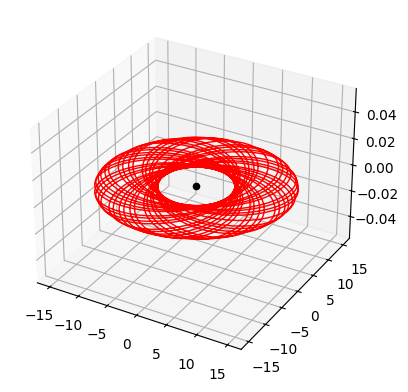

In [19]:
#      ( x , 0 , 0 ) ;  (delta_vx , x , 0 )
#delta_vx = min(np.abs(orbit.v_y)).value - 0.3e-6
delta_vx = 30
w0 = gd.PhaseSpacePosition(pos=[15, 0, 0] * u.kpc, vel=[delta_vx,419.2836,0] * u.km/u.s)
#w0 = gd.PhaseSpacePosition(pos=[15, 0, 0] * u.kpc, vel=[0,419.2836,0] * u.km/u.s)
orbit = gal.integrate_orbit(w0, dt=0.1*u.Myr, t1=0, t2=3*u.Gyr)

#----------------------------------------

fig = plt.figure(figsize=(20,20))

gs = gridspec.GridSpec(3, 8)
ax = fig.add_subplot(gs[:2, :2],projection='3d')
ax.plot(orbit.x, orbit.y, orbit.z, c='red', lw=1)
ax.scatter(0, 0, 0, color='black',label='Centro galactico')

Text(0, 0.5, 'z [kpc]')

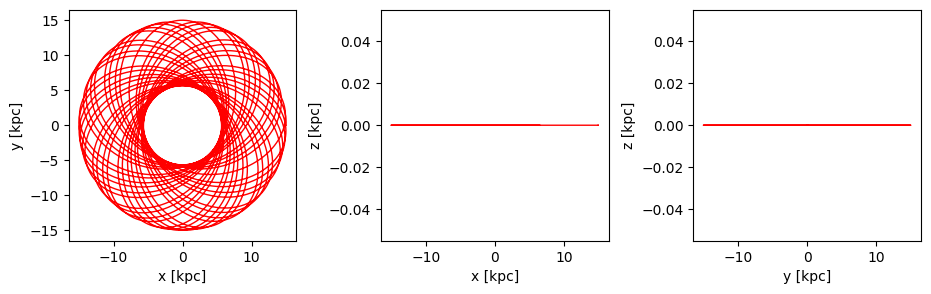

In [20]:
fig = plt.figure(figsize=(11, 3))

plt.subplots_adjust(wspace=0.37)

ax = fig.add_subplot(131)
ax.plot(orbit.x, orbit.y,c='red', lw=1)
ax.set_xlabel('x [kpc]')
ax.set_ylabel('y [kpc]')

ax = fig.add_subplot(132)
ax.plot(orbit.x, orbit.z,c='red', lw=1)
ax.set_xlabel('x [kpc]')
ax.set_ylabel('z [kpc]')

ax = fig.add_subplot(133)
ax.plot(orbit.y, orbit.z,c='red', lw=1)
ax.set_xlabel('y [kpc]')
ax.set_ylabel('z [kpc]')

(6.432096574862188, 6.432096574862299)

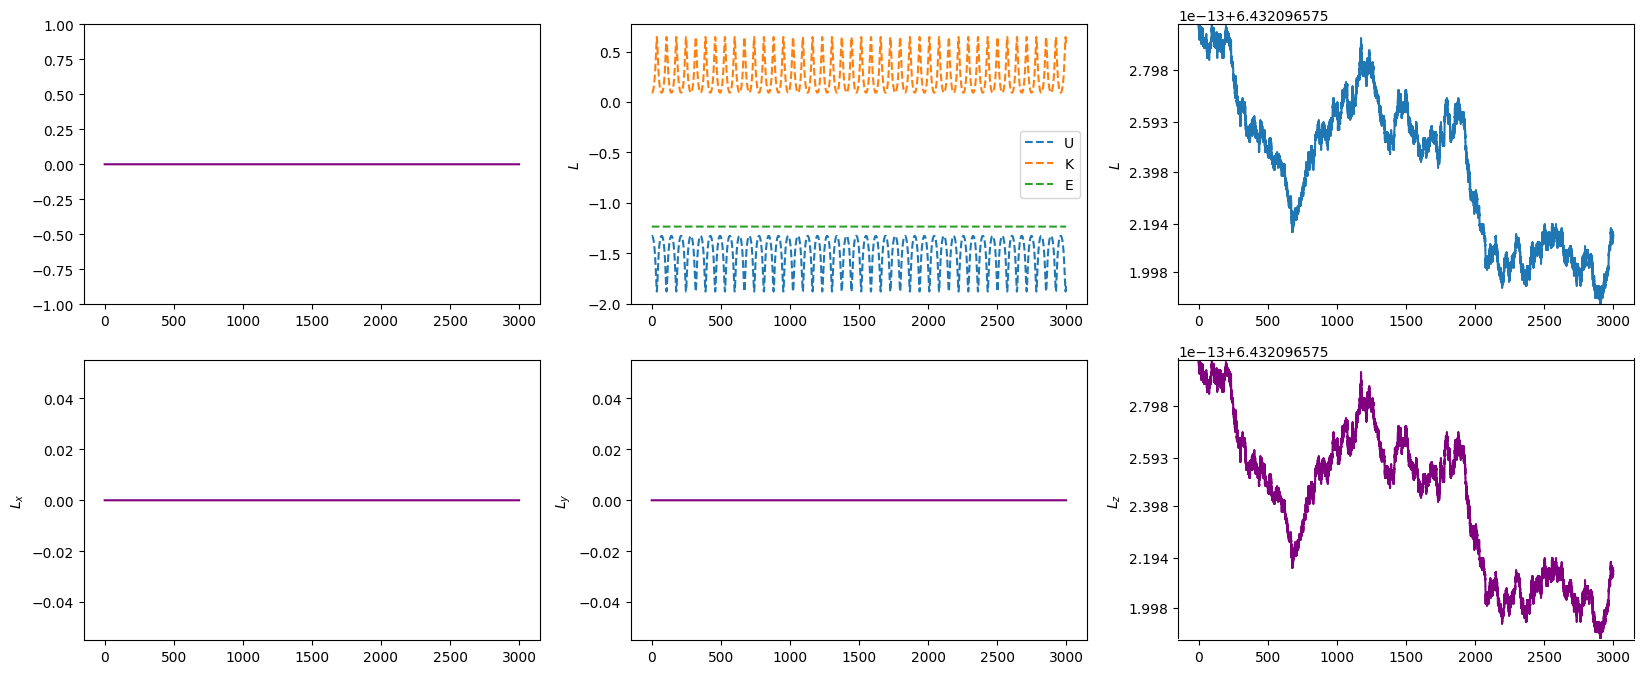

In [21]:

E = orbit.energy()
U_ = orbit.potential_energy()
K_ = orbit.kinetic_energy()
#E_ = U_ + K_
E_norm = (E[0]-E)/E[0]
L_ = orbit.angular_momentum()
Lx = L_[0]
Ly = L_[1]
Lz = L_[2]
ex = orbit.eccentricity()

L_tot = np.sqrt(Lx**2 + Ly**2 + Lz**2)
# -------------------------------------------------
fig, ((ax0, ax1, ax2), (ax3, ax4, ax5)) = plt.subplots(2, 3, figsize=(20, 8))

ax0.plot(orbit.t, E_norm, c='purple')
ax0.set_ylim(-1,1)

ax1.plot(orbit.t, U_, '--', label='U')
ax1.plot(orbit.t, K_, '--', label='K')
ax1.plot(orbit.t, E, '--', label='E')
ax1.set_ylabel(r'$L$')
ax1.legend()

ax2.plot(orbit.t, L_tot)
ax2.set_ylabel(r'$L$')
ax2.set_ylim(min(L_tot.value), max(L_tot.value))

ax3.plot(orbit.t, Lx, c='purple')
ax3.set_ylabel(r'$L_x$')

ax4.plot(orbit.t, Ly, c='purple')
ax4.set_ylabel(r'$L_y$')

ax5.plot(orbit.t, Lz, c='purple')
ax5.set_ylabel(r'$L_z$')
ax5.set_ylim(min(Lz.value), max(Lz.value))

Text(0, 0.5, '$\\dot{z}$ [kpc Myr$^{-1}$]')

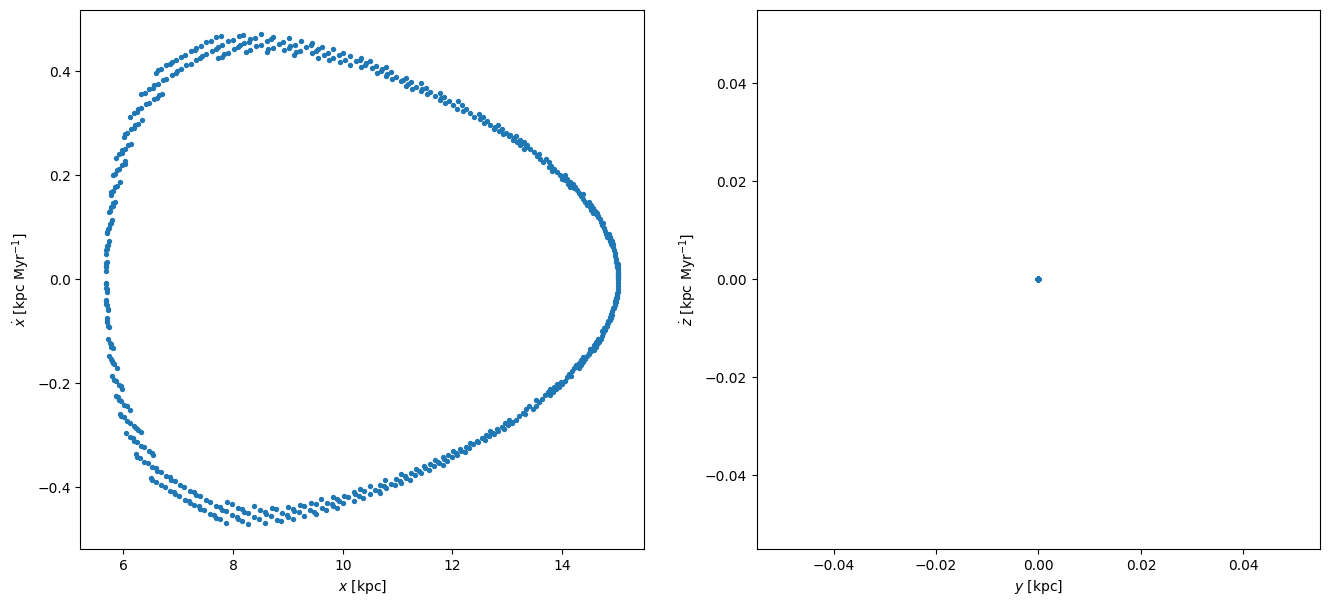

In [22]:
orbit = gal.integrate_orbit(w0, dt=1*u.Myr, t1=0, t2=100*u.Gyr)

delta = 0.2
#-----------------------------------------------------
p_x = orbit.x
p_y = orbit.y
p_z = orbit.z
v_x = orbit.v_x
v_y = orbit.v_y
v_z = orbit.v_z

# Identify intersection points
pci = np.where((np.abs(p_y.value) <= delta) & (v_y.value > 0))[0]

pc_p_x = p_x[pci]
pc_p_z = p_z[pci]
pc_v_x = v_x[pci]
pc_v_z = v_z[pci]

# Plot Poincaré surface
fig, axs = plt.subplots(1, 2, figsize=(16, 7))
axs[0].scatter(pc_p_x, pc_v_x, s=8)
axs[0].set_xlabel(r'$x$ [kpc]')
axs[0].set_ylabel(r'$\dot{x}$ [kpc Myr$^{-1}$]')

axs[1].scatter(pc_p_z, pc_v_z, s=8)
axs[1].set_xlabel(r'$y$ [kpc]')
axs[1].set_ylabel(r'$\dot{z}$ [kpc Myr$^{-1}$]')

## Just for fun!

In [23]:
dm_tri = gp.NFWPotential(m=0.85*tot_mass, r_s=30.*u.kpc, a=3, b=5, c=7, units=galactic)
#dm_tri = gp.NFWPotential(m=1e12 * u.Msun, r_s=25 * u.kpc, a=2, b=3, c=4, units=(u.kpc, u.Msun, u.Myr, u.radian))

w0 = gd.PhaseSpacePosition(pos=[15, 0, 0]*u.kpc, vel=[0, 419.2836, 0]*u.km/u.s)
w1 = gd.PhaseSpacePosition(pos=[15, 0, 0]*u.kpc, vel=[30, 419.2836, 0]*u.km/u.s)
w2 = gd.PhaseSpacePosition(pos=[15, 0, 0]*u.kpc, vel=[100, 419.2836, 0]*u.km/u.s)
w3 = gd.PhaseSpacePosition(pos=[5, 3, 15]*u.kpc, vel=[70, 127, 10]*u.km/u.s)
w4 = gd.PhaseSpacePosition(pos=[4, 7, 10]*u.kpc, vel=[30, 400, 80]*u.km/u.s)
w5 = gd.PhaseSpacePosition(pos=[7, 0, 0]*u.kpc, vel=[70, 100, 0]*u.km/u.s)

orbit_0 = dm_tri.integrate_orbit(w0, dt=0.1*u.Myr, t1=0, t2=100*u.Gyr)
orbit_1 = dm_tri.integrate_orbit(w1, dt=0.1*u.Myr, t1=0, t2=100*u.Gyr)
orbit_2 = dm_tri.integrate_orbit(w2, dt=0.1*u.Myr, t1=0, t2=100*u.Gyr)
orbit_3 = dm_tri.integrate_orbit(w3, dt=0.1*u.Myr, t1=0, t2=100*u.Gyr)
orbit_4 = dm_tri.integrate_orbit(w4, dt=0.1*u.Myr, t1=0, t2=100*u.Gyr)
orbit_5 = dm_tri.integrate_orbit(w5, dt=0.1*u.Myr, t1=0, t2=100*u.Gyr)

Text(0.5, 0, 'Z [kpc]')

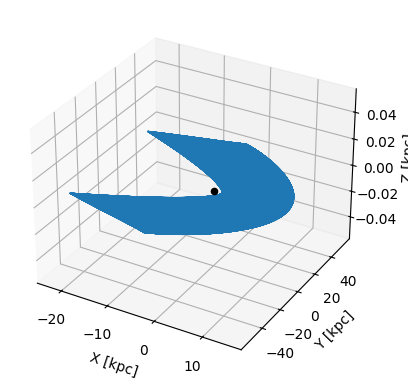

In [24]:
fig = plt.figure(figsize=(20,20))
gs = gridspec.GridSpec(3, 8)
ax = fig.add_subplot(gs[:2, :2],projection='3d')

#ax.plot(orbit_0.x, orbit_0.y, orbit_0.z, lw=1)
ax.plot(orbit_1.x, orbit_1.y, orbit_1.z, lw=1)
#ax.plot(orbit_2.x, orbit_2.y, orbit_2.z, lw=1)
#ax.plot(orbit_3.x, orbit_3.y, orbit_3.z, lw=1)
#ax.plot(orbit_4.x, orbit_4.y, orbit_4.z, lw=1)
#ax.plot(orbit_5.x, orbit_5.y, orbit_5.z, lw=1)

ax.scatter(0, 0, 0, color='black',label='Centro galactico')
ax.set_xlabel('X [kpc]')
ax.set_ylabel('Y [kpc]')
ax.set_zlabel('Z [kpc]')

In [25]:
delta = 0.2
#-----------------------------------------------------
p0_x = orbit_0.x
p0_y = orbit_0.y
p0_z = orbit_0.z
v0_x = orbit_0.v_x
v0_y = orbit_0.v_y
v0_z = orbit_0.v_z

#pci_0 = np.where((p0_x >= -delta) & (position_y <= delta) & (velocity_y > 0))[0]
pci_0 = np.where((np.abs(p0_y.value) <= delta) & (v0_y.value > 0))[0]

pc_p0_x = p0_x[pci_0]
pc_p0_z = p0_z[pci_0]
pc_v0_x = v0_x[pci_0]
pc_v0_z = v0_z[pci_0]
#-----------------------------------------------------
p1_x = orbit_1.x
p1_y = orbit_1.y
p1_z = orbit_1.z
v1_x = orbit_1.v_x
v1_y = orbit_1.v_y
v1_z = orbit_1.v_z

pci_1 = np.where((np.abs(p1_y.value) <= delta) & (v1_y.value > 0))[0]

pc_p1_x = p1_x[pci_1]
pc_p1_z = p1_z[pci_1]
pc_v1_x = v1_x[pci_1]
pc_v1_z = v1_z[pci_1]
#-----------------------------------------------------
p2_x = orbit_2.x
p2_y = orbit_2.y
p2_z = orbit_2.z
v2_x = orbit_2.v_x
v2_y = orbit_2.v_y
v2_z = orbit_2.v_z

pci_2 = np.where((np.abs(p2_y.value) <= delta) & (v2_y.value > 0))[0]

pc_p2_x = p2_x[pci_2]
pc_p2_z = p2_z[pci_2]
pc_v2_x = v2_x[pci_2]
pc_v2_z = v2_z[pci_2]
#-----------------------------------------------------
p3_x = orbit_3.x
p3_y = orbit_3.y
p3_z = orbit_3.z
v3_x = orbit_3.v_x
v3_y = orbit_3.v_y
v3_z = orbit_3.v_z

pci_3 = np.where((np.abs(p3_y.value) <= delta) & (v3_y.value > 0))[0]

pc_p3_x = p3_x[pci_3]
pc_p3_z = p3_z[pci_3]
pc_v3_x = v3_x[pci_3]
pc_v3_z = v3_z[pci_3]
#-----------------------------------------------------
p4_x = orbit_4.x
p4_y = orbit_4.y
p4_z = orbit_4.z
v4_x = orbit_4.v_x
v4_y = orbit_4.v_y
v4_z = orbit_4.v_z

pci_4 = np.where((np.abs(p4_y.value) <= delta) & (v4_y.value > 0))[0]

pc_p4_x = p4_x[pci_4]
pc_p4_z = p4_z[pci_4]
pc_v4_x = v4_x[pci_4]
pc_v4_z = v4_z[pci_4]
#-----------------------------------------------------
p5_x = orbit_5.x
p5_y = orbit_5.y
p5_z = orbit_5.z
v5_x = orbit_5.v_x
v5_y = orbit_5.v_y
v5_z = orbit_5.v_z

pci_5 = np.where((np.abs(p5_y.value) <= delta) & (v5_y.value > 0))[0]

pc_p5_x = p5_x[pci_5]
pc_p5_z = p5_z[pci_5]
pc_v5_x = v5_x[pci_5]
pc_v5_z = v5_z[pci_5]

Text(0, 0.5, '$\\dot{z}$ [kpc Myr$^{-1}$]')

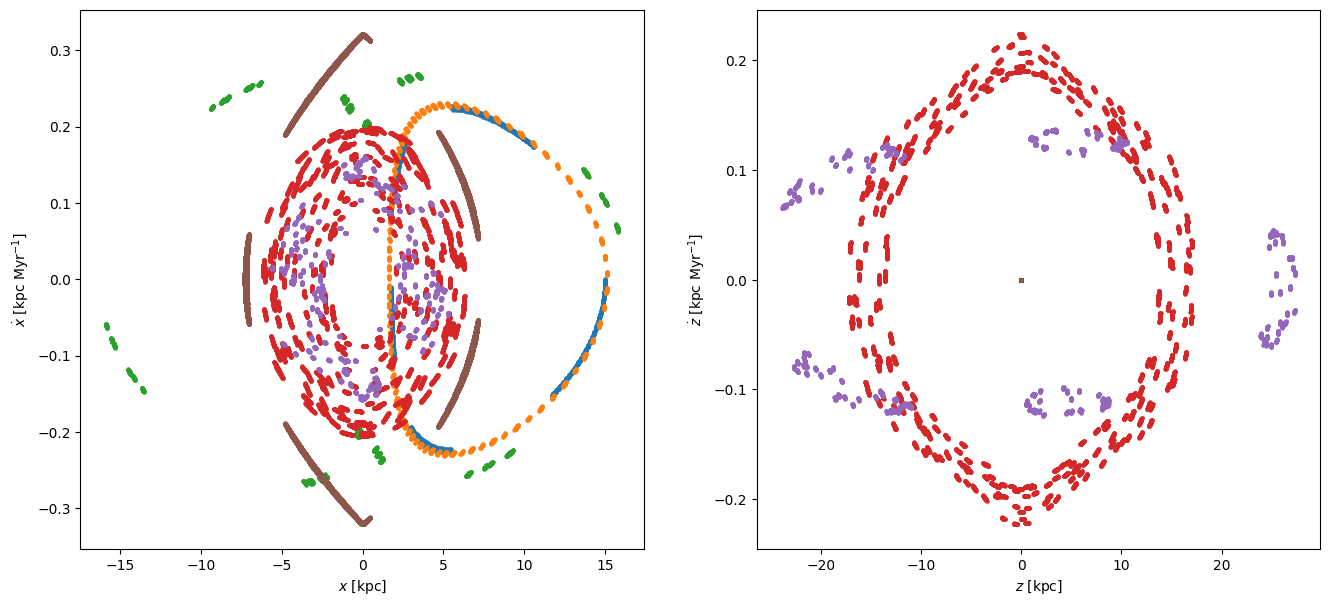

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(16, 7))

ax1 = axs[0]
ax1.scatter(pc_p0_x, pc_v0_x, s=5)
ax1.scatter(pc_p1_x, pc_v1_x, s=5)
ax1.scatter(pc_p2_x, pc_v2_x, s=5)
ax1.scatter(pc_p3_x, pc_v3_x, s=5)
ax1.scatter(pc_p4_x, pc_v4_x, s=5)
ax1.scatter(pc_p5_x, pc_v5_x, s=5)
ax1.set_xlabel(r'$x$ [kpc]')
ax1.set_ylabel(r'$\dot{x}$ [kpc Myr$^{-1}$]')
#ax1.set_xlim(-10, 10)
#ax1.set_ylim(-10, 10)

ax2 = axs[1]
ax2.scatter(pc_p0_z, pc_v0_z, s=5)
ax2.scatter(pc_p1_z, pc_v1_z, s=5)
ax2.scatter(pc_p2_z, pc_v2_z, s=5)
ax2.scatter(pc_p3_z, pc_v3_z, s=5)
ax2.scatter(pc_p4_z, pc_v4_z, s=5)
ax2.scatter(pc_p5_z, pc_v5_z, s=5)
ax2.set_xlabel(r'$z$ [kpc]')
ax2.set_ylabel(r'$\dot{z}$ [kpc Myr$^{-1}$]')